In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Run the following and use connect to local runtime on the top right button (beside editing)

pip install jupyter_http_over_ws

jupyter serverextension enable --py jupyter_http_over_ws

jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0

In Colaboratory, click the "Connect" button and select "Connect to local runtime...". Enter the URL in terminal from the previous step in the dialog that appears and click the "Connect" button. After this, you should now be connected to your local runtime. The URL should look like http://localhost:8888/

In [4]:
# after connecting to local runtime
train = pd.read_csv("../data/raw/train.csv")
# test = pd.read_csv("./data/raw/test.csv")
# aux_commercial = pd.read_csv("./data/raw/sg-commerical-centres.csv")
# aux_hawker = pd.read_csv("./data/raw/sg-gov-markets-hawker-centres.csv")
# aux_demographics = pd.read_csv("./data/raw/sg-population-demographics.csv")
# aux_primaryschools = pd.read_csv("./data/raw/sg-primary-schools.csv")
# aux_secondaryschools = pd.read_csv("./data/raw/sg-secondary-schools.csv")
# aux_shoppingmalls = pd.read_csv("./data/raw/sg-shopping-malls.csv")
# aux_trainstations = pd.read_csv("./data/raw/sg-train-stations.csv")

print(train.shape)
# print(test.shape)
# print(aux_commercial.shape)
# print(aux_hawker.shape)
# print(aux_demographics.shape)
# print(aux_primaryschools.shape)
# print(aux_shoppingmalls.shape)
# print(aux_trainstations.shape)

(431732, 17)


In [5]:
train.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
231221,2006-02,jurong west,5 room,851,jurong west street 81,01 to 03,129.0,improved,uncategorized,1996,1.346592,103.692474,0.0,yunnan,jurong west,west region,216000.0
409322,2010-01,ang mo kio,3-room,476,ang mo kio avenue 10,04 to 06,82.0,new generation,uncategorized,1979,1.362388,103.857881,0.0,chong boon,ang mo kio,north-east region,267750.0
319550,2003-09,queenstown,3 room,19,ghim moh road,07 to 09,76.0,improved,uncategorized,1977,1.311439,103.788299,0.0,ghim moh,queenstown,central region,168750.0
383756,2009-09,tampines,3 room,271,Tampines Street 21,04 to 06,75.0,model a,uncategorized,1984,1.349808,103.949578,0.0,tampines east,tampines,east region,252000.0
170295,2012-05,woodlands,4-room,530,woodlands drive 14,01 to 05,104.0,premium apartment,uncategorized,1999,1.431411,103.793187,0.0,woodlands south,woodlands,north region,373500.0


In [6]:
df_na = train[train.isna().any(axis=1)]
print("There are {} data points that have at least 1 missing value (NA)".format(df_na.shape[0]))

There are 0 data points that have at least 1 missing value (NA)


In [7]:
# for col in train.columns:
#   print(train[col].value_counts())
print(train['eco_category'].value_counts())
print(train['elevation'].value_counts())
print(train['flat_type'].value_counts())

uncategorized    431732
Name: eco_category, dtype: int64
0.0    431732
Name: elevation, dtype: int64
4 room              135679
3 room               99886
5 room               77133
4-room               33918
executive            32724
3-room               25835
5-room               21564
2 room                3580
2-room                 942
1 room                 222
multi generation       185
1-room                  64
Name: flat_type, dtype: int64


eco_category is all uncategorized. elevation is all 0. Propose we drop these columns entirely.

clean flat_type by combining "4-room" and "4 room", "5-room" and "5 room" etc.

Propose to create a new column price_per_sqm by dividing resale_price by floor_area_sqm. This allows us to compare across vastly different house sizes.

In [8]:
train['year'] = train.month.str[:4].astype(int)
train['month'] = train.month.str[5:].astype(int)

train['price_per_sqm'] = train.resale_price / train.floor_area_sqm # adds a new column ppsqm
train['age'] = train.year - train.lease_commence_date # adds new col age
train = train.drop(['eco_category', 'elevation'], axis=1)

train['flat_type'] = train.flat_type.str.replace("-", " ")

train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price,year,price_per_sqm,age
0,8,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,pasir ris,east region,209700.0,2001,1777.118644,12
1,10,punggol,5 room,196B,punggol field,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,punggol,north-east region,402300.0,2014,3657.272727,11
2,9,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,sengkang,north-east region,351000.0,2020,3133.928571,16
3,10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi north,clementi,west region,151200.0,2000,2256.716418,20
4,1,bukit batok,3 room,163,bukit batok street 11,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok west,bukit batok,west region,318600.0,2013,4364.383562,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,3,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,2000,1.429658,103.792583,woodlands south,woodlands,north region,238500.0,2005,2361.386139,5
431728,4,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,2012,1.390053,103.875941,fernvale,sengkang,north-east region,376200.0,2016,3960.000000,4
431729,1,tampines,3 room,829,tampines street 81,01 to 03,67.0,new generation,1986,1.349224,103.934913,tampines west,tampines,east region,255600.0,2011,3814.925373,25
431730,5,sengkang,5 room,233,compassvale walk,16 to 18,123.0,improved,1999,1.389941,103.900721,sengkang town centre,sengkang,north-east region,508500.0,2013,4134.146341,14


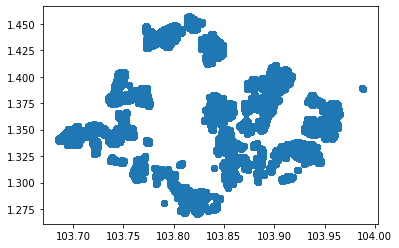

In [9]:
### Where

plt.scatter(train.longitude, train.latitude) # longitude is x axis
plt.show()

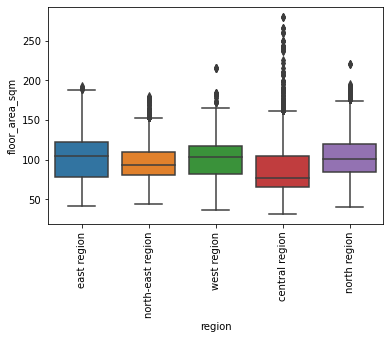

In [10]:
p = sns.boxplot(x=train.region, y=train.floor_area_sqm)
plt.xticks(rotation=90)
plt.show()

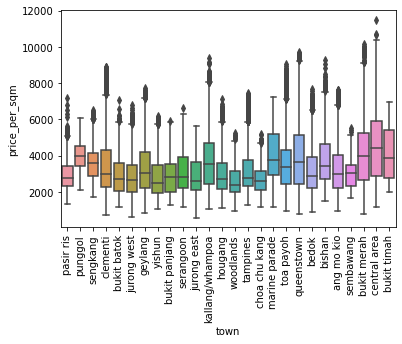

In [11]:
p = sns.boxplot(x=train.town, y=train.price_per_sqm)
plt.xticks(rotation=90)
plt.show()

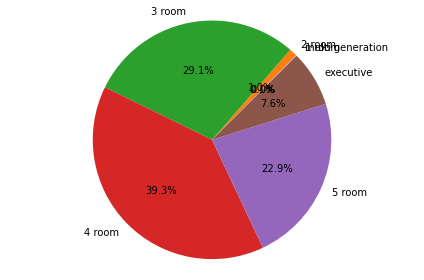

In [12]:
### What. Housing type proportion in the data set

# Calculate all unique labels together with their respective counts
(labels, counts) = np.unique(train.flat_type, return_counts=True)

# Normalize the counts
counts = counts / np.sum(counts)

fig1, ax1 = plt.subplots()
plt.tick_params(labelsize=24)

patches, texts, autotexts = ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=45)

for t in texts:
    t.set_fontsize(10)
for t in autotexts:
    t.set_fontsize(10)    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

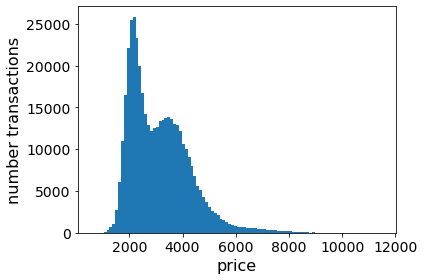

In [13]:
### Distribution of price_per_sqm

plt.figure()
plt.tick_params(labelsize=14)
plt.hist(train['price_per_sqm'].to_numpy(), bins=100)
plt.xlabel('price', fontsize=16)
plt.ylabel('number transactions', fontsize=16)
plt.tight_layout()
plt.show()

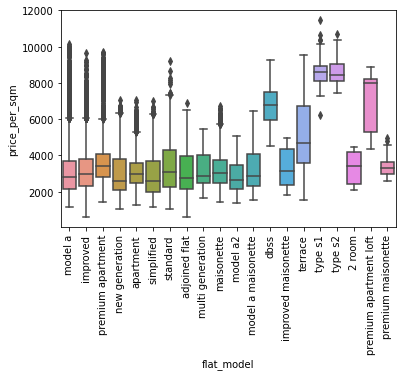

In [14]:
### flat_model is a relatively good predictor for s1, s2 models
p = sns.boxplot(x=train.flat_model, y=train.price_per_sqm)
plt.xticks(rotation=90)
plt.show()

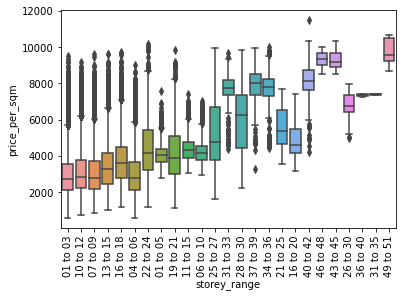

In [15]:
### storey range on its own isnt a strong predictor
p = sns.boxplot(x=train.storey_range, y=train.price_per_sqm)
plt.xticks(rotation=90)
plt.show()

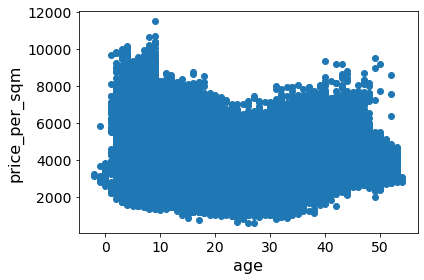

In [16]:
### Age alone isnt a strong predictor either since there isnt any obvious correlation

X_price = train.price_per_sqm
X_age = train.age

plt.figure()
plt.tick_params(labelsize=14)
plt.scatter(X_age, X_price)
plt.xlabel('age', fontsize=16)
plt.ylabel('price_per_sqm', fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
print(aux_commercial.sample(5))
for col in aux_commercial.columns:
  print(aux_commercial[col].value_counts())

Alexandra                                        1
Loyang Industrial Estate                         1
Nanyang Technological University                 1
Changi Business Park                             1
Seletar Regional Centre                          1
Jurong Industrial Estate                         1
Changi Aviation Park                             1
Lorong Halus Industrial Park                     1
Paya Lebar Central                               1
Seletar Aerospace Park                           1
Tuas Medical Park                                1
Woodlands Regional Centre                        1
Central Business District                        1
Changi East Urban District                       1
Airport Logistics Park                           1
Singapore Institute of Technology                1
International Business Park                      1
Singapore Management University                  1
Jurong Innovation District                       1
Serangoon                      

Keep all columns for aux_commercial

In [36]:
for col in aux_hawker.columns:
  print(aux_hawker[col].value_counts())

Bedok Food Centre                                                                   1
Queen Street Blk 270 (Albert Centre)                                                1
Holland Drive Blk 44 (Holland Drive Market and Food Centre)                         1
Havelock Road Blk 22A/B (Havelock Road Cooked Food Centre)                          1
Bukit Merah View Blk 115 (Blk 115 Bukit Merah View Market and Food Centre)          1
                                                                                   ..
Changi Village Blk 2 and 3                                                          1
Ang Mo Kio Ave 10 Blk 527 (Cheng San Market and Cooked Food Centre)                 1
Jalan Bukit Merah Blk 112 (Blk 112 Jalan Bukit Merah Market and Food Centre)        1
Telok Blangah Crescent Blk 11 (11 Telok Blangah Crescent Market and Food Centre)    1
Bendemeer Road Blk 29 (Bendemeer Market and Food Centre)                            1
Name: name, Length: 114, dtype: int64
1.327120    1
1.

Keep all for aux_hawker

In [37]:
for col in aux_demographics.columns:
  print(aux_demographics[col].value_counts())

bukit merah                534
queenstown                 454
toa payoh                  396
ang mo kio                 360
yishun                     318
bukit batok                288
hougang                    288
bukit timah                288
bedok                      288
kallang                    287
rochor                     264
clementi                   252
bukit panjang              252
pasir ris                  224
woodlands                  216
choa chu kang              216
jurong west                216
serangoon                  216
novena                     180
sengkang                   180
sembawang                  179
jurong east                179
punggol                    169
newton                     165
river valley               157
geylang                    144
tanglin                    144
tampines                   143
outram                     133
bishan                     108
marine parade              108
downtown core               98
changi  

Propose to only keep columns where sub_zone/planning_area match those in train dataset.

In [38]:
for col in aux_primaryschools.columns:
  print(aux_primaryschools[col].value_counts())

Mayflower Primary School           1
Changkat Primary School            1
Townsville Primary School          1
Fuhua Primary School               1
Woodlands Primary School           1
                                  ..
New Town Primary School            1
Bendemeer Primary School           1
West View Primary School           1
Lakeside Primary School            1
CHIJ St. Nicholas Girls' School    1
Name: name, Length: 191, dtype: int64
1.348763    1
1.340714    1
1.404702    1
1.291284    1
1.416531    1
           ..
1.401981    1
1.382366    1
1.389513    1
1.364484    1
1.318752    1
Name: lat, Length: 191, dtype: int64
103.883251    1
103.718737    1
103.889537    1
103.785779    1
103.918274    1
             ..
103.790327    1
103.950874    1
103.808217    1
103.952275    1
103.784216    1
Name: lng, Length: 190, dtype: int64


Keep all cols in prisch. Potential assumption when using number/distance of pri schs to predict hdb price is that all pri schs are equally desireable. Should focus on 1km and 2km radius. https://www.moe.gov.sg/primary/p1-registration/distance

In [39]:
for col in aux_secondaryschools.columns:
  print(aux_secondaryschools[col].value_counts())

Juying Secondary School                    1
West Spring Secondary School               1
Kuo Chuan Presbyterian Secondary School    1
Ngee Ann Secondary School                  1
Nan Chiau High School                      1
                                          ..
Westwood Secondary School                  1
Hillgrove Secondary School                 1
Unity Secondary School                     1
Northbrooks Secondary School               1
Pasir Ris Secondary School                 1
Name: name, Length: 150, dtype: int64
1.325560    1
1.371660    1
1.374573    1
1.308304    1
1.352089    1
           ..
1.439598    1
1.340494    1
1.436023    1
1.441739    1
1.324740    1
Name: lat, Length: 150, dtype: int64
103.780551    1
103.775941    1
103.882471    1
103.746029    1
103.755231    1
             ..
103.793147    1
103.720154    1
103.802324    1
103.902312    1
103.837127    1
Name: lng, Length: 150, dtype: int64


Keep all cols in sec schools. Potential assumption when using number/distance of sec schs to predict hdb price is that all sec schs are equally desireable. Could use PSLE cut-off point but 1. only useful if the buyer has kids 2. buyer has kids who can reach that cut off 3. may have a negative correlation with price if schools cause crowding?

In [40]:
for col in aux_shoppingmalls.columns:
  print(aux_shoppingmalls[col].value_counts())

Roxy Square                    1
Hougang Green Shopping Mall    1
100 AM                         1
Changi Airport                 1
People's Park Centre           1
                              ..
West Mall                      1
Tampines 1                     1
Boon Lay Shopping Centre       1
Singapore Shopping Centre      1
Great World City               1
Name: name, Length: 174, dtype: int64
1.317258    2
1.315029    2
1.299953    2
1.288187    1
1.354653    1
           ..
1.326074    1
1.372384    1
1.384313    1
1.392034    1
1.378555    1
Name: lat, Length: 171, dtype: int64
103.764498    2
103.855278    2
103.843601    2
103.697519    1
103.839364    1
             ..
103.836324    1
103.830582    1
103.894953    1
103.760167    1
103.749257    1
Name: lng, Length: 171, dtype: int64
/wiki/Marina_Bay_Sands              2
/wiki/Funan,_Singapore              1
/wiki/Bedok_Point                   1
/wiki/Ngee_Ann_City                 1
/wiki/Changi_City_Point             1
     

Propose to drop the wiki page. Potential assumption when using number/distance of malls to predict hdb price is that all malls are equally desireable.

In [41]:
for col in aux_trainstations.columns:
  print(aux_trainstations[col].value_counts())

Sengkang          2
Punggol           2
Choa Chu Kang     2
Bukit Panjang     2
Kaki Bukit        1
                 ..
Coral Edge        1
Chinese Garden    1
Sembawang         1
Pioneer           1
Tampines          1
Name: name, Length: 162, dtype: int64
CC28            1
DT22            1
BP11            1
NS24/NE6/CC1    1
DT28            1
               ..
DT5             1
CC25            1
DT11/NS21       1
EW28            1
NS9/TE2         1
Name: codes, Length: 166, dtype: int64
1.397170    1
1.376142    1
1.377750    1
1.329988    1
1.329956    1
           ..
1.336607    1
1.321038    1
1.311834    1
1.397317    1
1.288385    1
Name: lat, Length: 166, dtype: int64
103.765299    1
103.862859    1
103.744553    1
103.879759    1
103.787208    1
             ..
103.839075    1
103.827019    1
103.793851    1
103.892380    1
103.888195    1
Name: lng, Length: 166, dtype: int64
2017.0    17
1987.0    14
2003.0    14
1989.0    13
1988.0    11
2011.0    10
2015.0    10
2010.0    

In [44]:
aux_trainstations.sample(5)

,name,codes,lat,lng,opening_year,type
13,Pasir Ris,EW1,1.372983,103.949268,1989.0,mrt
53,Thanggam,SW4,1.397317,103.875635,NaN,other
66,Meridian,PE2,1.396911,103.908950,NaN,other
157,Changi Airport,CG2,1.357314,103.988364,2002.0,mrt
163,Telok Ayer,DT18,1.282289,103.848302,2013.0,mrt


Clarifications: does type=other mean LRT? IF opening_year = NaN means yet to be opened?

Proposal to split a mrt line intersection e.g. Dhoby Ghaut, Paya Lebar, City Hall, Jurong East, Serangoon into multiple stations (and assign them the same lat lng) since they access multiple lines. (Unless it's a LRT line?)

Potentially assumes any train line is as desireable as another.